   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\Dell\AppData\Local\Temp\ipykernel_7412\2063659820.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7412\2063659820.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

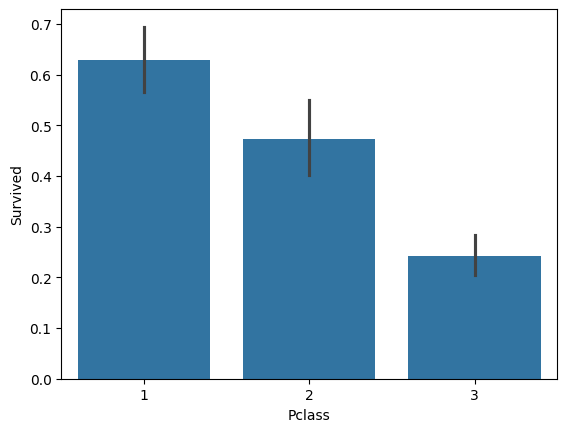

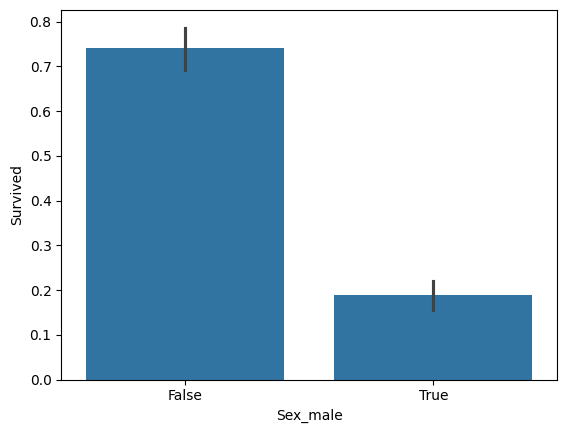

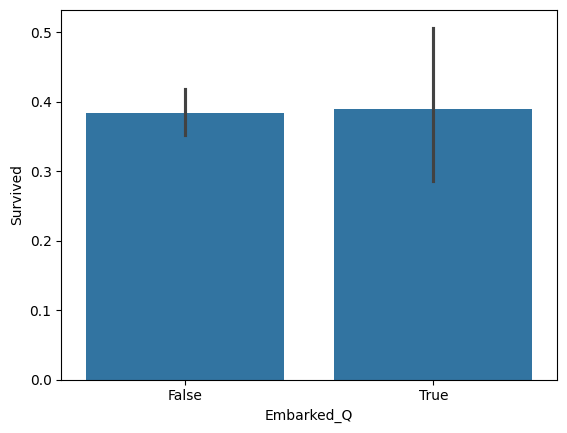

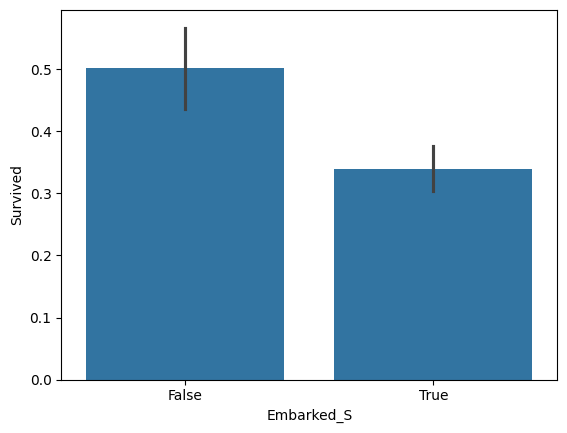

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

            Coefficient
Pclass        -0.785328
Age           -0.396152
SibSp         -0.349952
Parch         -0.096142
Fare           0.126511
Sex_male      -1.277104
Embarked_Q    -0.046058
Embarked_S    -0.189423


In [7]:
# Make a system which tells whether the person will be save from sinking.
# What factors were most likely lead to success-socio-economic status, age,gender and more.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def load_data(filepath):
    return pd.read_csv(filepath)

def explore_data(data):
    print(data.head())
    print(data.info())
    print(data.describe())

def clean_data(data):
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data.drop(columns=['Cabin'], inplace=True)
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
    data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
    return data

def visualize_data(data):
    sns.barplot(x='Pclass', y='Survived', data=data)
    plt.show()
    sns.barplot(x='Sex_male', y='Survived', data=data)
    plt.show()
    sns.barplot(x='Embarked_Q', y='Survived', data=data)
    plt.show()
    sns.barplot(x='Embarked_S', y='Survived', data=data)
    plt.show()

# Model Building
def build_model(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)
    return model, scaler

# Model Evaluation
def evaluate_model(model, scaler, X_test, y_test):
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return y_pred

def main():
    filepath = r'D:\\Internship\\Task_1\\Titanic classification\\train.csv'
    data = load_data(filepath)
    explore_data(data)
    data = clean_data(data)
    visualize_data(data)
    
    X = data.drop(columns='Survived')
    y = data['Survived']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model, scaler = build_model(X_train, y_train)
    evaluate_model(model, scaler, X_test, y_test)
    
    # Analyze coefficients
    coefficients = pd.DataFrame(model.coef_.flatten(), X.columns, columns=['Coefficient'])
    print(coefficients)

if __name__ == "__main__":
    main()